# Virtual Pruning

## Importing the digitized structure

In [1]:
from openalea.mtg import *
from numpy import *
import numpy as np
from importlib import reload
import numpy as np
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [2]:
from matplotlib.pyplot import *
import mtgplot as mp
reload(mp)


<module 'mtgplot' from 'D:\\V_mango\\virtualpruning\\notebooks\\mtgplot.py'>

In [3]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': 'buDZBswy1S6ioDpJIb7ULxK41', 'data': b'x\xda\x9c}\t|\x15\xd5\xf5\xffc\xc7\'\x8b@\xd…

## Pruning procedure

To select a pruning point, we start from terminal points, trace back into the structure up to 3 layers. We check if the pruning point is valid by looking the depth of what it carries. If it is in average close to what is intended we select it. Else we select another one.

Point d'amélioration : tailler en fait au milieu de la n4.

In [4]:
import pruning ; reload(pruning)
from pruning import *

## Estimation of light interception

In [5]:
import lightestimation as le ; reload(le)
from lightestimation import *

In [6]:
sun, sky = get_light_sources()

In [7]:
scene = mp.representation(g, wood = False, leaves=True)

In [8]:
caribumango = toCaribuScene(scene)

Convert scene for caribu
done in 4.599311113357544


In [9]:
agg = caribu(caribumango, sun, sky)

start caribu...
Create light source ...  55  sources.
Run caribu
made in 10.037626504898071


In [10]:
mp.plot_projection(scene, agg['irradiance'])

SceneWidget(scenes=[{'id': 'LjI2q3AMIVYC3i4pqCnz8qrRg', 'data': b'x\xda\x8c\x9d\x07X\x14\xd7\x16\xc7\xb1wE\xc5…

In [11]:
agg2 = plantgllight(scene, sun, sky)


start plantgl light...
Create light source ...  55  sources.
Run plantGL
made in 27.349929571151733


In [12]:
#print(agg2)
mp.plot_projection(scene, agg2['irradiance'])

SceneWidget(scenes=[{'id': 'Xet7BOJ2rm91z4NqtyxS47yT8', 'data': b'x\xda\x8c\x9d\x07X\x14\xd7\x16\xc7\xb1wE\xc5…

In [17]:
print(min(agg['irradiance']),max(agg['irradiance']),np.mean(agg['irradiance']))
print(min(agg2['irradiance']),max(agg2['irradiance']),np.mean(agg2['irradiance']))


139.478508947439 102134.53387127486 15401.064943081525
145.70946060628765 106243.82043762569 15758.903197011485


<AxesSubplot:>

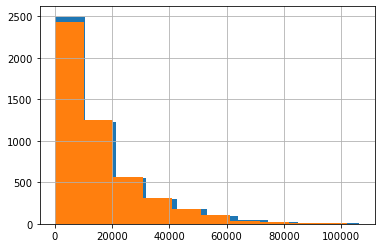

In [18]:
agg2['irradiance'].hist()
agg['irradiance'].hist()


[   1.03892146 -241.59360931]


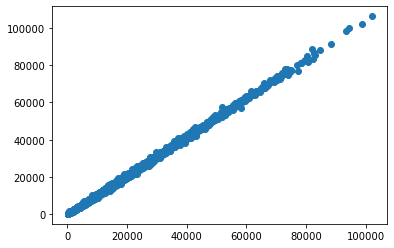

In [19]:
scatter(agg['irradiance'],agg2['irradiance'])
print(np.polyfit(agg['irradiance'],agg2['irradiance'],1))

In [20]:
set_light_to_mtg(g, agg)

In [21]:
set_light_to_mtg(g, agg2)

In [22]:
scene2 = mp.representation(g, wood = True, leaves=True)

In [23]:
agg3 = plantgllight(scene2, sun, sky)

start plantgl light...
Create light source ...  55  sources.
Run plantGL
made in 64.9553370475769


In [24]:
mp.plot_projection(scene2, agg3['irradiance'])

SceneWidget(scenes=[{'id': 'SZKioASxvFQi6vu36lNYvJSRE', 'data': b'x\xda\xcc\xbd\x05|\x14W\xf8\xef\x1d\x82\x07\…